In [1]:
from pipe import *
from matplotlib import pyplot as plt

In [16]:
nn=1000
np.random.seed(1)
my_pos=np.random.uniform(0,300,size=(nn,3))

In [46]:
my_2pct=twopcf(my_pos,random_scale=20,boxscale=[0,300])

In [47]:
psi,array=my_2pct.Natural(bins=15)
DP_psi,array=my_2pct.DP(bins=15)
Hamilton_psi,array=my_2pct.Hamilton(bins=15)
LS_psi,array=my_2pct.LS(bins=15)

Progress: 100%|██████████| 999/999 [00:00<00:00, 20734.39it/s]


make DD done


Progress: 100%|██████████| 19999/19999 [00:04<00:00, 4823.62it/s] 


make RR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 27387.23it/s]


make DD done


Progress: 100%|██████████| 999/999 [00:00<00:00, 2604.63it/s]


make DR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 27616.48it/s]


make DD done


Progress: 100%|██████████| 19999/19999 [00:04<00:00, 4793.89it/s] 


make RR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 2675.16it/s]


make DR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 27660.05it/s]


make DD done


Progress: 100%|██████████| 19999/19999 [00:04<00:00, 4865.60it/s] 


make RR done


Progress: 100%|██████████| 999/999 [00:00<00:00, 2701.37it/s]

make DR done


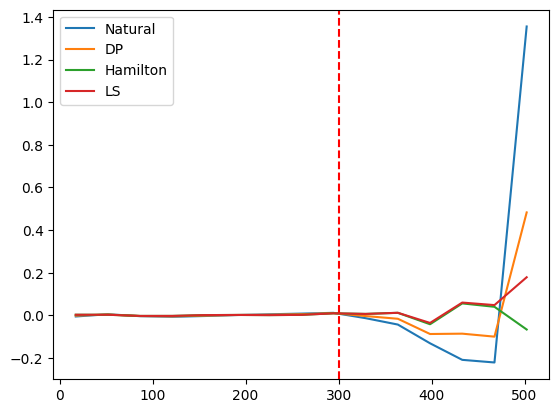

In [18]:
plt.plot(array,psi,label='Natural')
plt.plot(array,DP_psi,label='DP')
plt.plot(array,Hamilton_psi,label='Hamilton')
plt.plot(array,LS_psi,label='LS')
plt.axvline(300,linestyle='--', c='r')
plt.legend()

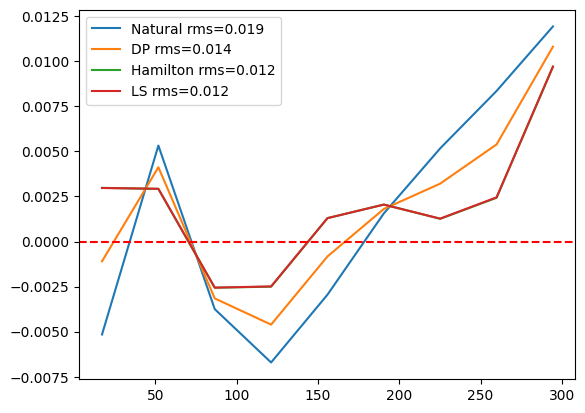

In [27]:
cutoff=array<300

plt.plot(array[cutoff],psi[cutoff],label='Natural rms={:.3f}'.format(np.sqrt(np.sum(psi[cutoff]**2))))
plt.plot(array[cutoff],DP_psi[cutoff],label='DP rms={:.3f}'.format(np.sqrt(np.sum(DP_psi[cutoff]**2))))
plt.plot(array[cutoff],Hamilton_psi[cutoff],label='Hamilton rms={:.3f}'.format(np.sqrt(np.sum(Hamilton_psi[cutoff]**2))))
plt.plot(array[cutoff],LS_psi[cutoff],label='LS rms={:.3f}'.format(np.sqrt(np.sum(LS_psi[cutoff]**2))))
plt.axhline(0,linestyle='--', c='r')
plt.legend()

In [ ]:
nn=500
np.random.seed(1)
my_pos=np.random.uniform(0,300,size=(nn,3))

nnn=30
nnnn=20

rms=np.zeros((nnnn,nnn))
DP_rms=np.zeros((nnnn,nnn))
Hamilton_rms=np.zeros((nnnn,nnn))
LS_rms=np.zeros((nnnn,nnn))

for jj in range(nnnn):

    for ii in range(nnn):
        my_2pct=twopcf(my_pos,random_scale=(ii+1),boxscale=[0,300])
        
        psi,array=my_2pct.Natural(bins=15)
        DP_psi,array=my_2pct.DP(bins=15)
        Hamilton_psi,array=my_2pct.Hamilton(bins=15)
        LS_psi,array=my_2pct.LS(bins=15)

        cutoff=array<300

        rms[jj,ii]=np.sqrt(np.sum(psi[cutoff]**2))
        DP_rms[jj,ii]=np.sqrt(np.sum(DP_psi[cutoff]**2))
        Hamilton_rms[jj,ii]=np.sqrt(np.sum(Hamilton_psi[cutoff]**2))
        LS_rms[jj,ii]=np.sqrt(np.sum(LS_psi[cutoff]**2))

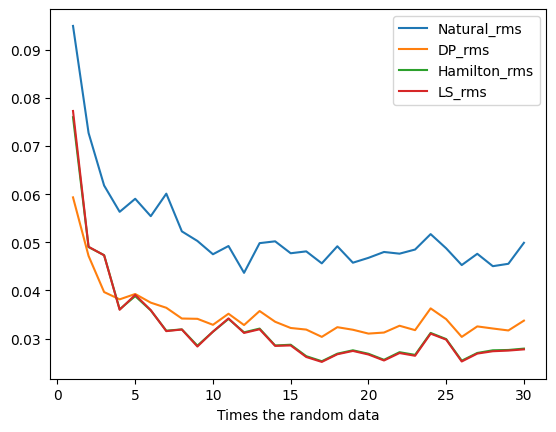

In [69]:
step=np.linspace(1,nnn,nnn)

plt.plot(step, np.mean(rms,axis=0), label='Natural_rms')
plt.plot(step, np.mean(DP_rms,axis=0) , label='DP_rms')
plt.plot(step, np.mean(Hamilton_rms,axis=0) , label='Hamilton_rms')
plt.plot(step, np.mean(LS_rms,axis=0), label='LS_rms')
plt.xlabel('Times the random data')
plt.legend()